In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Activation Functions and Their Derivatives

---

## 1. Linear
*Function:*  $$ f(x) = x $$  

*Derivative:* $$ f'(x) = 1 $$  

---

## 2. Sigmoid
*Function:*  $$ f(x) = \frac{1}{1 + e^{-x}} $$  

*Derivative:**  $$ f'(x) = f(x)\,(1 - f(x)) $$  

---

## 3. Tanh
*Function:*  $$ f(x) = \tanh(x) $$  

*Derivative:*  $$ f'(x) = 1 - \tanh^2(x) $$  

---

## 4. ReLU
*Function:*  
$$
f(x) =
\begin{cases}
0, & x < 0 \\
x, & x \geq 0
\end{cases}
$$  

**Derivative:**  
$$
f'(x) =
\begin{cases}
0, & x < 0 \\
1, & x > 0
\end{cases}
$$  

In [8]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))

def tanh(x):
    return 1/(((np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))))

def relu(x):
    return np.maximum(0,x)

In [9]:
def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh_derivative(x):
    return 1-np.power(tanh(x),2)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

In [10]:
x = np.arange(-5.0,5.0,0.1)
#print(x)

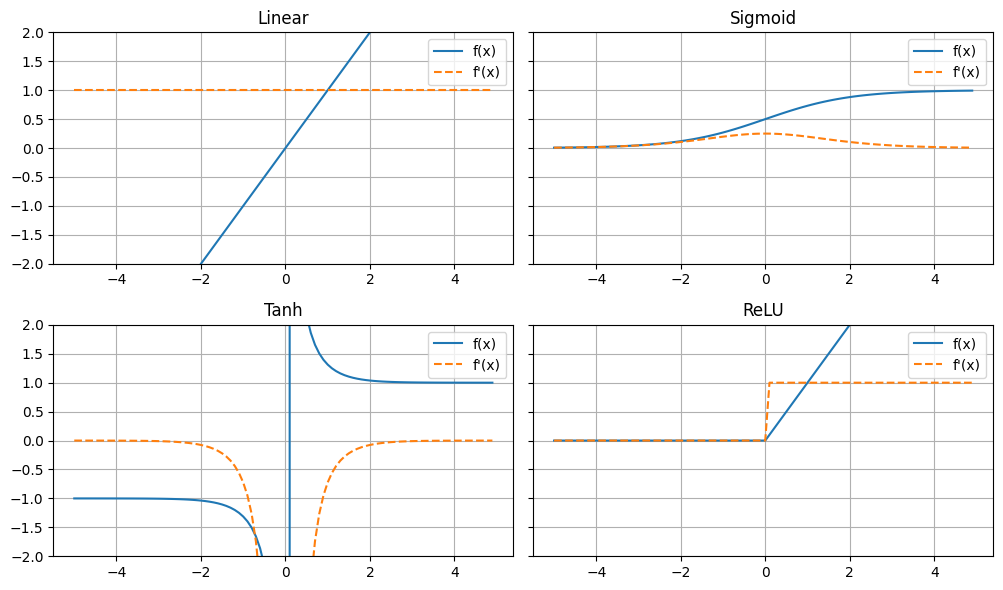

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharey=True)


# Linear
axs[0, 0].plot(x, x, label="f(x)")
axs[0, 0].plot(x, np.ones_like(x), '--', label="f'(x)")
axs[0, 0].set_title("Linear")

# Sigmoid
axs[0, 1].plot(x, sigmoid(x), label="f(x)")
axs[0, 1].plot(x, sigmoid_derivative(x), '--', label="f'(x)")
axs[0, 1].set_title("Sigmoid")

# Tanh
axs[1, 0].plot(x, tanh(x), label="f(x)")
axs[1, 0].plot(x, tanh_derivative(x), '--', label="f'(x)")
axs[1, 0].set_title("Tanh")

# ReLU
axs[1, 1].plot(x, relu(x), label="f(x)")
axs[1, 1].plot(x, relu_derivative(x), '--', label="f'(x)")
axs[1, 1].set_title("ReLU")

for ax in axs.flat:
    ax.set_ylim([-2, 2])
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

---

## 5. Leaky ReLU
**Function:**  
$$
f(x) =
\begin{cases}
\alpha x, & x < 0 \\
x, & x \geq 0
\end{cases}
$$  

**Derivative:**  
$$
f'(x) =
\begin{cases}
\alpha, & x < 0 \\
1, & x > 0
\end{cases}
$$  

---

## 6. ELU (Exponential Linear Unit)
**Function:**  
$$
f(x) =
\begin{cases}
\alpha(e^x - 1), & x < 0 \\
x, & x \geq 0
\end{cases}
$$  

**Derivative:**  
$$
f'(x) =
\begin{cases}
f(x) + \alpha, & x < 0 \\
1, & x \geq 0
\end{cases}
$$  

---

## 7. GELU (Gaussian Error Linear Unit)
**Function (exact):**  
$$ f(x) = x \cdot \Phi(x) $$  



**Approximation:**  
$$ f(x) \approx 0.5x \left(1 + \tanh\!\Big(\sqrt{\tfrac{2}{\pi}}(x + 0.044715x^3)\Big)\right) $$  

**Derivative:**  
$$ f'(x) = \Phi(x) + x \cdot \phi(x) $$  

where \( \Phi(x) \) is the CDF of the standard normal distribution.  

In [12]:
def leaky_relu(alpha, x):
  return np.maximum(alpha * x, x)


def derivative_leaky_relu(alpha, x):
  #return np.maximum(alpha, 1) this won't work
  return np.where(x > 0, 1.0, alpha)


In [13]:
def elu(alpha, x):
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))
  # or the other way to this is using boolean mask (x>0)
  #return (x > 0) * x + (x <= 0) * alpha * (np.exp(x) - 1)


def derivative_elu(alpha, x):
  return np.where(x > 0, x, alpha * (np.exp(x) - 1))

In [14]:
from math import pi
from scipy.special import erf

def gelu(x):
    return 0.5*x*(1 + erf(x/np.sqrt(2)))

def derivative_gelu(x):
    return 0.5*(1+erf(x/np.sqrt(2))) + x/(np.sqrt(2)*pi) * np.exp(-x*x/2)

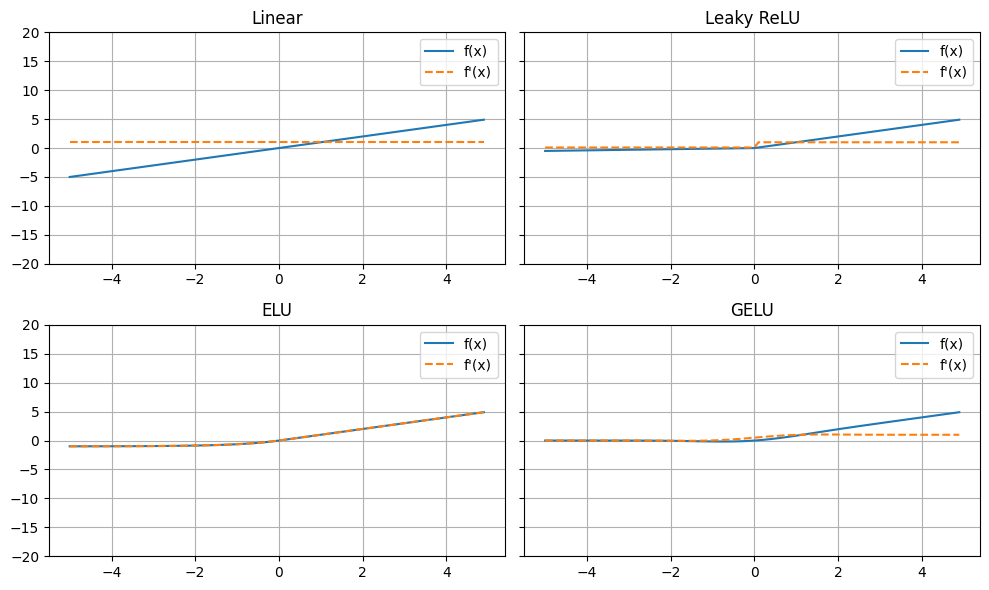

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6), sharey=True)

# Linear
axs[0, 0].plot(x, x, label="f(x)")
axs[0, 0].plot(x, np.ones_like(x), '--', label="f'(x)")
axs[0, 0].set_title("Linear")

# Leaky ReLU
axs[0, 1].plot(x, leaky_relu(0.1, x), label="f(x)")
axs[0, 1].plot(x, derivative_leaky_relu(0.1, x), '--', label="f'(x)")
axs[0, 1].set_title("Leaky ReLU")

# ELU
axs[1, 0].plot(x, elu(1, x), label="f(x)")
axs[1, 0].plot(x, derivative_elu(1, x), '--', label="f'(x)")
axs[1, 0].set_title("ELU")

# GELU
axs[1, 1].plot(x, gelu(x), label="f(x)")
axs[1, 1].plot(x, derivative_gelu(x), '--', label="f'(x)")
axs[1, 1].set_title("GELU")

for ax in axs.flat:
    ax.set_ylim([-20, 20])
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## 8. Softmax (Naive)  
**Function:**  
$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$  

**Derivative (Jacobian):**  
$$
\frac{\partial \sigma_i}{\partial z_j} =
\begin{cases}
\sigma_i (1 - \sigma_i), & i = j \\\\
-\sigma_i \sigma_j, & i \neq j
\end{cases}
$$  

---

## 9. Softmax (Stable)  
**Function (numerical stability trick):**  
$$
\sigma(z_i) = \frac{e^{\,z_i - \max_k z_k}}{\sum_{j} e^{\,z_j - \max_k z_k}}
$$  

- Subtracting \( \max_k z_k \) prevents overflow but doesn’t change the result.  
- **Derivative is the same as naive softmax.**  

---

## 10. Log-Softmax  
**Function:**  
$$
\text{log\_softmax}(z_i) = z_i - \log\!\left(\sum_{j} e^{z_j}\right)
$$  

**Derivative:**  
$$
\frac{\partial}{\partial z_j}\,\text{log\_softmax}(z_i) =
\begin{cases}
1 - \sigma_i, & i = j \\\\
-\sigma_j, & i \neq j
\end{cases}
$$  

where \( \sigma_j \) is the softmax output.  


In [16]:
def softmax_naive(x):
  return np.exp(x)/np.sum(np.exp(x), axis=-1, keepdims=True)


def softmax_naive_derivative(x):
  return softmax_naive(x)*(1-softmax_naive(x))


In [18]:
def softmax_stable(x):
  return np.exp(x-np.max(x, axis=-1, keepdims=True))/np.sum(np.exp(x-np.max(x, axis=-1, keepdims=True)), axis=-1, keepdims=True)


def softmax_stable_derivative(x):
  return softmax_stable(x)*(1-softmax_stable(x))

In [ ]:
def softmax_log(x):
  numerator = x - np.max(x, axis=-1, keepdims=True)
  denominator = np.log(np.sum(np.exp(x)-np.max(x, axis=-1, keepdims=True), axis=-1, keepdims=True))
  return numerator - denominator


def softmax_log_derivative(x):
  return 1-softmax_log(x)

In [30]:
x = np.arange(-10.0,10.0,1)

In [33]:
print(softmax_naive(x))

[3.54164282e-09 9.62718333e-09 2.61693975e-08 7.11357977e-08
 1.93367146e-07 5.25626400e-07 1.42880069e-06 3.88388295e-06
 1.05574885e-05 2.86982290e-05 7.80098745e-05 2.12052824e-04
 5.76419339e-04 1.56687021e-03 4.25919483e-03 1.15776919e-02
 3.14714295e-02 8.55482150e-02 2.32544158e-01 6.32120560e-01]


In [32]:
print(softmax_stable(x))

[3.54164282e-09 9.62718333e-09 2.61693975e-08 7.11357977e-08
 1.93367146e-07 5.25626400e-07 1.42880069e-06 3.88388295e-06
 1.05574885e-05 2.86982290e-05 7.80098745e-05 2.12052824e-04
 5.76419339e-04 1.56687021e-03 4.25919483e-03 1.15776919e-02
 3.14714295e-02 8.55482150e-02 2.32544158e-01 6.32120560e-01]


In [34]:
print(softmax_log(x))

[-28.44453385 -27.44453385 -26.44453385 -25.44453385 -24.44453385
 -23.44453385 -22.44453385 -21.44453385 -20.44453385 -19.44453385
 -18.44453385 -17.44453385 -16.44453385 -15.44453385 -14.44453385
 -13.44453385 -12.44453385 -11.44453385 -10.44453385  -9.44453385]


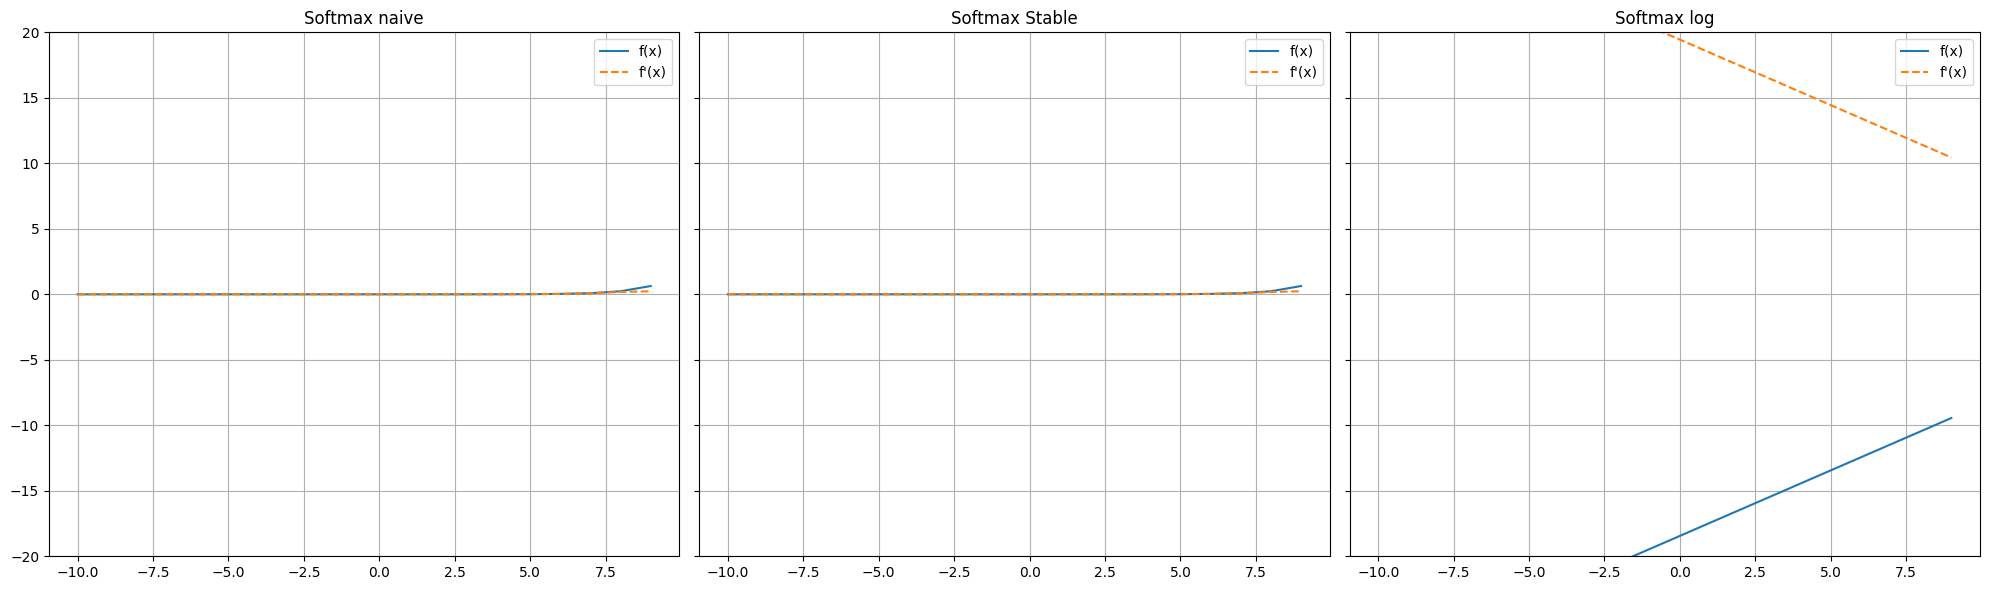

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Softmax naive
axs[0].plot(x, softmax_naive(x), label="f(x)")
axs[0].plot(x, softmax_naive_derivative(x), '--', label="f'(x)")
axs[0].set_title("Softmax naive")

# Softmax Stable
axs[1].plot(x, softmax_stable(x), label="f(x)")
axs[1].plot(x, softmax_stable_derivative(x), '--', label="f'(x)")
axs[1].set_title("Softmax Stable")

# Softmax log
axs[2].plot(x, softmax_log(x), label="f(x)")
axs[2].plot(x, softmax_log_derivative(x), '--', label="f'(x)")
axs[2].set_title("Softmax log")


for ax in axs.flat:
    ax.set_ylim([-20, 20])
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()